In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
     

import pandas as pd
     

# Convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) to the DataFrame
iris_df['species'] = iris.target
     

iris_df.head()
     


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
null_values = iris_df.isnull().sum()

# Display the result
print(null_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='species'), iris_df['species'], test_size=0.2, random_state=42)

# Create the logistic regression model with the one-vs-rest (ovr) strategy
log_reg = LogisticRegression(multi_class='ovr', max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


c:\Users\Kapil Raghav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


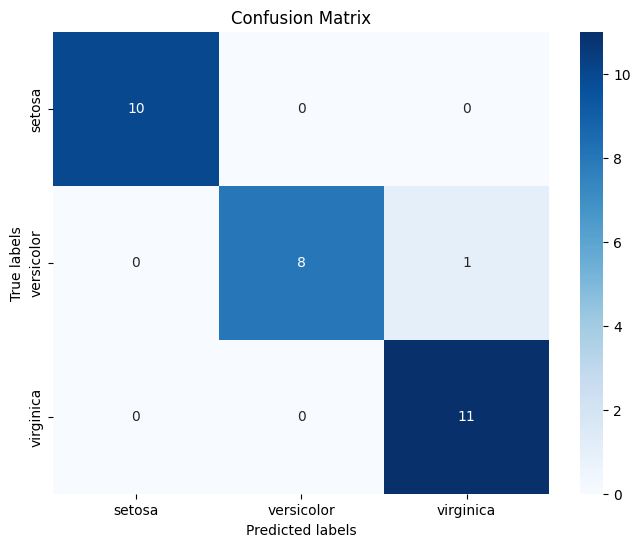

In [14]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Use the weather dataset to implement the decision tree. Try differentavailable parameters of the inbuilt method.

In [16]:
wedf=pd.read_csv('weather.csv')

In [17]:
wedf.head()

,Outlook,Temp,Humidity,Windy,Play
0,rainy,hot,high,0,0
1,rainy,hot,high,1,0
2,overcast,hot,high,0,1
3,sunny,mild,high,0,1
4,sunny,cool,normal,0,1


In [18]:
df_encoded = pd.get_dummies(wedf, columns=['Outlook', 'Temp', 'Humidity']).astype(int)

In [19]:
df_encoded.head()

,Windy,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temp_cool,Temp_hot,Temp_mild,Humidity_high,Humidity_normal
0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,1,1,0
4,0,1,0,0,1,1,0,0,0,1


In [20]:
y=df_encoded['Play']
x=df_encoded.drop(columns='Play',axis=1)

In [21]:
x.head()

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temp_cool,Temp_hot,Temp_mild,Humidity_high,Humidity_normal
0,0,0,1,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,1,0
4,0,0,0,1,1,0,0,0,1


In [22]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int32

In [39]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
train_data, test_data, train_output,test_output = train_test_split(x,y, test_size=0.2, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:

treemodel=DecisionTreeClassifier()

In [42]:
treemodels=DecisionTreeClassifier(criterion="entropy")
treemodels.fit(train_data,train_output)
     


DecisionTreeClassifier(criterion='entropy')

In [43]:
treemodel.fit(train_data,train_output)

DecisionTreeClassifier()

[Text(0.6, 0.9, 'x[1] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.7, 'x[7] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.55, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.7, 0.3, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6499999999999999, 0.8, '  False')]

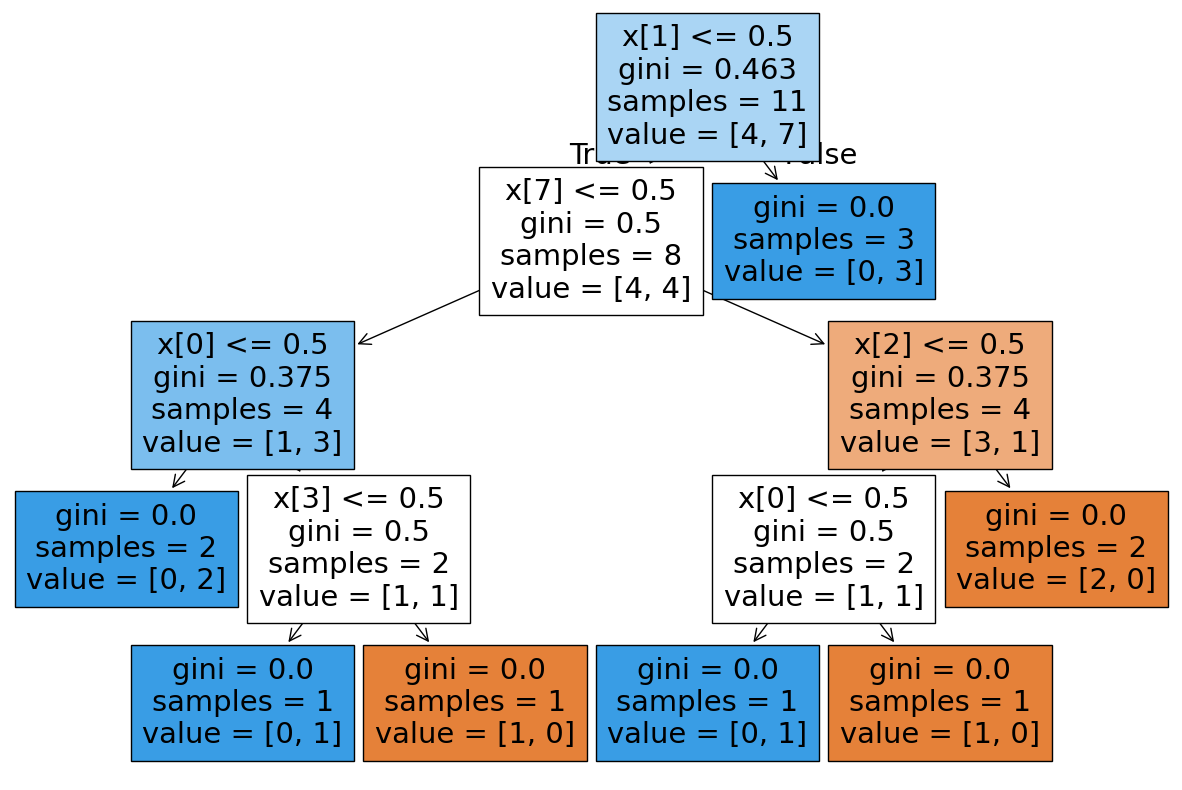

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [45]:

pred=treemodel.predict(test_data)

In [46]:
accuracy = accuracy_score(test_output,pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [48]:
print(test_data.shape)
print(pred.shape)


(3, 9)
(3,)


In [62]:
import numpy as np
test_data_1=(np.argmax(test_data,axis=1))
print(test_data_1)

[3 0 2]


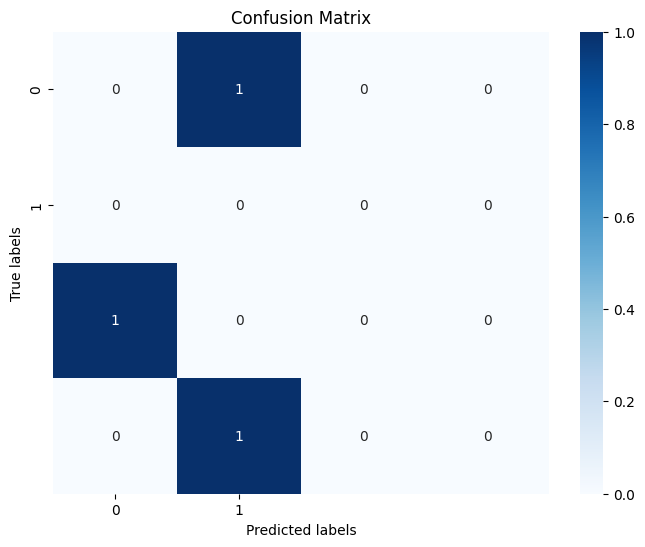

In [63]:
conf_matrix = confusion_matrix(test_data_1, pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Bank Note

Accuracy: 98.06%


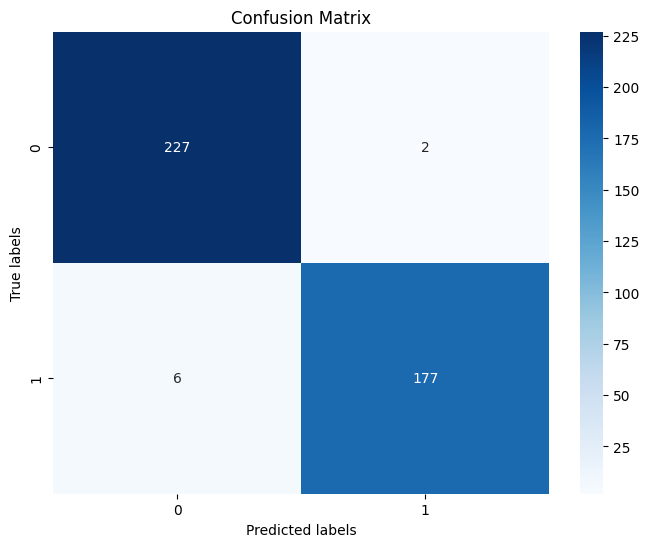

In [64]:
url = 'https://drive.google.com/uc?id=12r4j7yjGC4s_TigKEHyISSY1NSPzF3eX'  # Direct download link
data = pd.read_csv(url)

data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Split data into features (X) and labels (y)
X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)  # CART uses 'gini' by default
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [65]:
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
